# <center>Time Series Analysis </center>

<img src="https://cdn.pixabay.com/photo/2019/05/30/17/53/cardiac-pulse-4240338__340.jpg" width=760> 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
df=pd.read_csv("Train_SU63ISt.csv")
df.head()
df=pd.read_csv("Train_SU63ISt.csv",nrows=11856)

df.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [15]:
#create train and test set
#Index 10392 marks the end of October 2013
train=df[0:10392]
test=df[10392:]


/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/tejas/virt_pythree/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


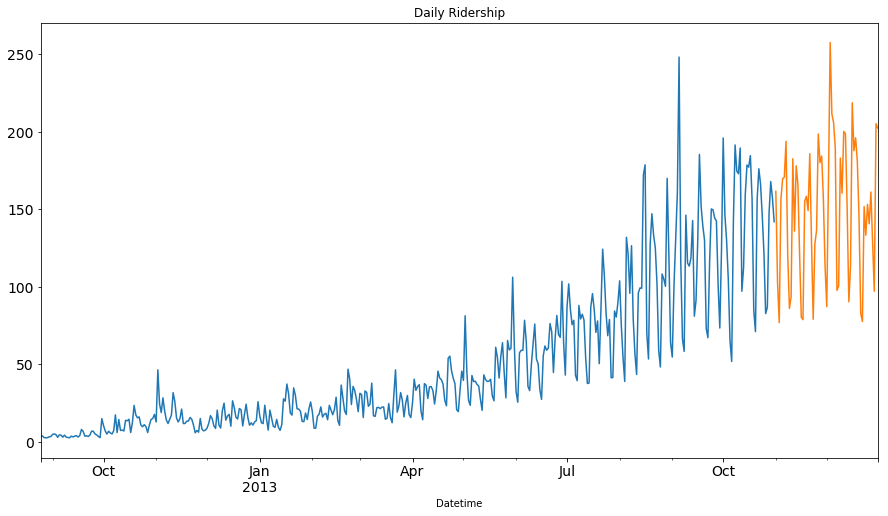

In [19]:
#Aggregating the dataset at daily level

df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 

test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()


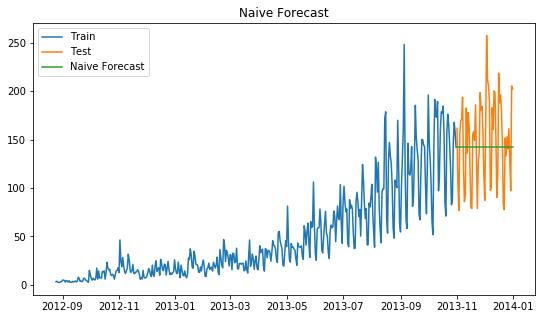

In [22]:
# naive

dd=np.asarray(train.Count)
y_hat=test.copy()

y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(9,5))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [23]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print("Root mean square Error: ", rms)


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

Root mean square Error:  43.91640614391676


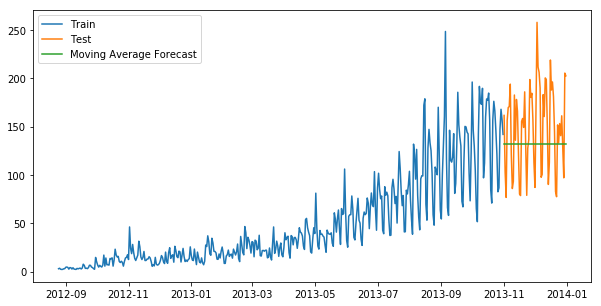

In [24]:


#moving average
'''We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.'''

y_hat_avg = test.copy()

y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]

plt.figure(figsize=(10,5))

plt.plot(train['Count'], label='Train')

plt.plot(test['Count'], label='Test')

plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')

plt.legend(loc='best')

plt.show()

In [25]:


rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))

print("Root mean square Error: ", rms)

Root mean square Error:  46.72840725106963


__Visit <i><a href="https://www.github.com/tejas-2232">Github </a></i> to explore more exciting content__ 
<br>
__Connect on <i><a href=""> LinkedIn</a> </i>for prefessional dialogue__